In [1]:
import coremltools as ct
import numpy as np

In [3]:
seg_model = ct.models.MLModel("DeeplabV3.mlmodel")

In [19]:
image_dim = 257
x = 255.*np.random.rand(1, image_dim, image_dim, 3)
preds=seg_model.predict({'ImageTensor':x}, useCPUOnly=True)
preds = preds['SemanticPredictions']

In [16]:
np.sum(preds)

0.0

In [21]:
import cv2 as cv

In [23]:
im=cv.imread('./mkbhd_potrait.png')

In [36]:
def get_border_dims(img):
    h, w, c = img.shape
    dim = max(w,h)
    bl = (dim-w)//2
    br = dim-(w+bl)
    bt = (dim-h)//2
    bb = dim-(h+bt)
    return bt, bb, bl, br

def padded_resize(img):
    bt, bb, bl, br = get_border_dims(img)
    padded_img = cv.copyMakeBorder(img, bt, bb, bl, br, cv.BORDER_CONSTANT)
    return padded_img

def adapt_to_model_input(img):
    MODEL_IN_IMAGE_SIZE = image_dim # batch_size, w, h, channels
    h, w, c = img.shape
    resize_ratio = 1.0 * MODEL_IN_IMAGE_SIZE / max(w, h)
    target_size = (int(resize_ratio * w), int(resize_ratio * h))
    resized_image = cv.resize(img, target_size)
    resized_image = cv.cvtColor(resized_image, cv.COLOR_BGR2RGB)
    padded_im = padded_resize(resized_image)
    # im_normed = padded_im.astype(np.uint8)#(padded_im/255.).astype(np.float32)
    batched_im = np.expand_dims(padded_im, 0)
    return batched_im.astype(np.float32)
model_in_img = adapt_to_model_input(im)

In [31]:
import matplotlib.pyplot as plt
plt.imshow(model_in_img.squeeze())

In [50]:
preds=seg_model.predict({'ImageTensor':model_in_img}, useCPUOnly=True)
preds = preds['SemanticPredictions'].astype(np.int32).squeeze()

(array([5.7605e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 8.4420e+03, 0.0000e+00, 2.0000e+00]),
 array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20.]),
 <BarContainer object of 10 artists>)

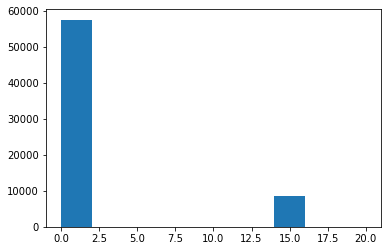

In [48]:
plt.hist(preds.astype(np.int32).flatten())

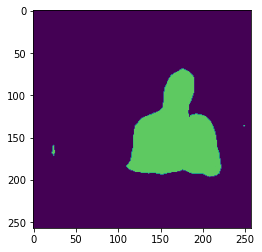

In [51]:
plt.imshow(preds)